# Logistic Classification

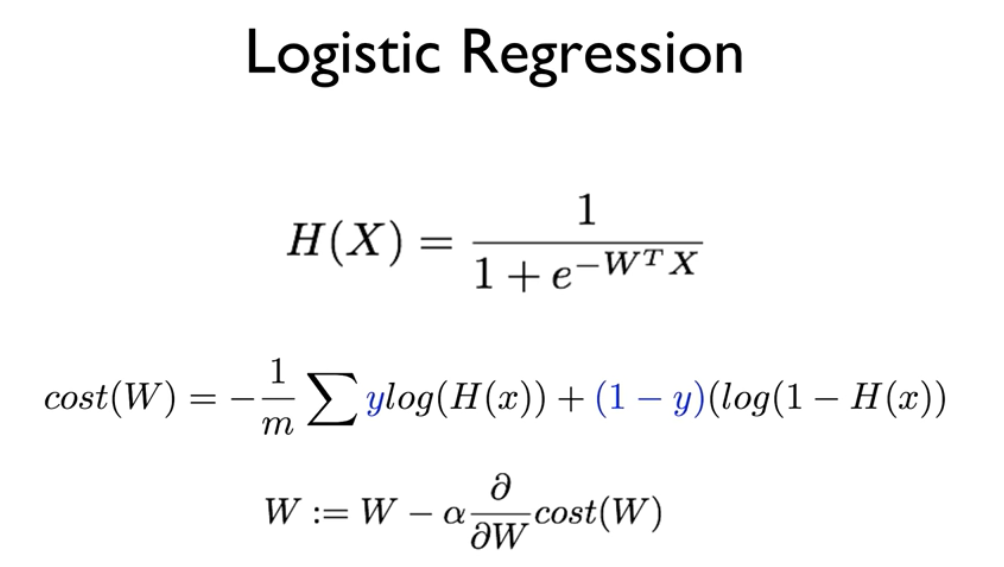

In [2]:
import tensorflow as tf

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], 
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis:\n", h, "\nCorrect (Y):\n", c, "\nAccuracy: ", a)

0 0.97054404
1000 0.43135563
2000 0.3650032
3000 0.31348217
4000 0.2731447
5000 0.24120922
6000 0.21556099
7000 0.19464783
8000 0.17734331
9000 0.16282795
10000 0.15050031

Hypothesis:
 [[0.03116381]
 [0.15941581]
 [0.30688995]
 [0.7804599 ]
 [0.9389926 ]
 [0.9799738 ]] 
Correct (Y):
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


In [3]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y: y_data}
    for step in range(10001):
        sess.run([train], feed_dict=feed)
        if step % 1000 == 0:
            print(step, sess.run(cost, feed_dict=feed))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed)
    print("\nHypothesis:\n", h, "\nCorrect (Y):\n", c, "\nAccuracy: ", a)

0 1.190196
1000 0.59841305
2000 0.5456431
3000 0.5175488
4000 0.50193393
5000 0.49274674
6000 0.48701793
7000 0.48325157
8000 0.48066026
9000 0.47880858
10000 0.47744352

Hypothesis:
 [[0.4124328 ]
 [0.9353751 ]
 [0.229314  ]
 [0.9534185 ]
 [0.10433701]
 [0.7809972 ]
 [0.93871915]
 [0.56123644]
 [0.28863388]
 [0.553717  ]
 [0.7052951 ]
 [0.14959553]
 [0.24765733]
 [0.32895395]
 [0.72887135]
 [0.3908267 ]
 [0.7352091 ]
 [0.8248068 ]
 [0.81636226]
 [0.5647686 ]
 [0.6660747 ]
 [0.09975278]
 [0.66509354]
 [0.676335  ]
 [0.34506142]
 [0.94479346]
 [0.604582  ]
 [0.6546495 ]
 [0.71201193]
 [0.43605217]
 [0.9569295 ]
 [0.896222  ]
 [0.60161996]
 [0.8288019 ]
 [0.3452552 ]
 [0.63613135]
 [0.80889815]
 [0.5091613 ]
 [0.45488027]
 [0.33224952]
 [0.8697543 ]
 [0.14406428]
 [0.4199188 ]
 [0.03886861]
 [0.5824877 ]
 [0.9357089 ]
 [0.67954373]
 [0.69075763]
 [0.9520477 ]
 [0.938874  ]
 [0.9384601 ]
 [0.25051048]
 [0.33248883]
 [0.97285706]
 [0.19719192]
 [0.3900493 ]
 [0.09851471]
 [0.6584449 ]
 [0.